In [1]:
import itertools

import numpy as np
from qutip import *
# some_file.py
from mpl_toolkits.mplot3d import Axes3D

from qudit import *
# import scipy
import time
import IPython.display as disp
from tqdm.notebook import tqdm
import multiprocess as mp
import matplotlib.pyplot as plt
from discrete_simulation import *
import matplotlib.colors as colors
from dataclasses import dataclass


%load_ext autoreload
%autoreload 2

In [22]:
d = 16
m_i = 16
m_c = 16
fidelity_cut = 0
gamma_list = np.logspace(-3,-1,11)
gamma_ratio = 1
alpha=4

process_count = 20  # mp.cpu_count()-9

simulation16 = DiscreteSimulation(d, m_i,m_c, alpha=alpha )

with mp.Pool(process_count) as pool:
    fid_prob_list = pool.starmap(simulation16.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_cut] * len(gamma_list)))
fid_list1616 = [tup[0] for tup in fid_prob_list]
prob_list1616 = [tup[1] for tup in fid_prob_list]

print(1)

m_i = 16
m_c = 8
simulation8 = DiscreteSimulation(d, m_i,m_c, alpha=alpha)

with mp.Pool(process_count) as pool:
    fid_prob_list = pool.starmap(simulation8.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_cut] * len(gamma_list)))
fid_list_168 = [tup[0] for tup in fid_prob_list]
prob_list_168 = [tup[1] for tup in fid_prob_list]

print(2)

m_i = 16
m_c = 4
simulation4 = DiscreteSimulation(d, m_i,m_c, alpha=alpha)

with mp.Pool(process_count) as pool:
    fid_prob_list = pool.starmap(simulation4.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_cut] * len(gamma_list)))
fid_list_164 = [tup[0] for tup in fid_prob_list]
prob_list_164 = [tup[1] for tup in fid_prob_list]

print(3)

m_i = 16
m_c = 2
simulation2 = DiscreteSimulation(d, m_i,m_c, alpha=alpha)

with mp.Pool(process_count) as pool:
    fid_prob_list = pool.starmap(simulation2.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_cut] * len(gamma_list)))
fid_list_162 = [tup[0] for tup in fid_prob_list]
prob_list_162 = [tup[1] for tup in fid_prob_list]


print(4)

m_i = 16
m_c = 8
simulation8 = DiscreteSimulation(d, m_i,m_c, alpha=alpha)

with mp.Pool(process_count) as pool:
    fid_prob_list = pool.starmap(simulation8.average_fidelity_no_communication, zip(list(gamma_list),list(gamma_ratio*gamma_list)))
fid_list_168_NC = [tup[0] for tup in fid_prob_list]
prob_list_168_NC = [tup[1] for tup in fid_prob_list]

print(5)

m_i = 16
m_c = 4
simulation4 = DiscreteSimulation(d, m_i,m_c, alpha=alpha)

with mp.Pool(process_count) as pool:
    fid_prob_list = pool.starmap(simulation4.average_fidelity_no_communication, zip(list(gamma_list),list(gamma_ratio*gamma_list)))
fid_list_164_NC = [tup[0] for tup in fid_prob_list]
prob_list_164_NC = [tup[1] for tup in fid_prob_list]

1
2
3
4
5


In [12]:
m_i = 16
m_c = 8
m_f= 4
simulation2 = DiscreteSimulation(d, m_i,m_c, m_f=m_f)

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation2.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list)))
fid_list_1684 = [tup[0] for tup in fid_prob_list]
prob_list_1684 = [tup[1] for tup in fid_prob_list]

m_i = 16
m_c = 8
m_f= 4
simulation2 = DiscreteSimulation(d, m_i,m_c, m_f=m_f)
fidelity_cut=0.9

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation2.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_cut] * len(gamma_list)))
fid_list_1684_cut = [tup[0] for tup in fid_prob_list]
prob_list_1684_cut = [tup[1] for tup in fid_prob_list]

In [130]:
m_i = 16
m_c = 2
simulation2 = DiscreteSimulation(d, m_i,m_c)

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation2.average_fidelity_no_communication, zip(list(gamma_list),list(gamma_ratio*gamma_list)))
fid_list_162_NC = [tup[0] for tup in fid_prob_list]
prob_list_162_NC = [tup[1] for tup in fid_prob_list]

In [165]:
d=16
m_i=16
qudit4 = EntangledQudit(d,d)

def trivial_fidelity_for_parallel(gamma, d=d, qudit4=qudit4,m_i=m_i):
    import itertools
    print(m_i)
    fid_prob = sum([(qudit4.fidelity_trivial(m_i,s_A,s_B,l_A,l_B)
                     * qudit4.p(gamma_loss_A=gamma, gamma_dephasing_A=gamma, s_A=s_A, s_B=s_B, l_A=l_A, l_B=l_B))
                    for s_A,s_B,l_A,l_B in itertools.product(range(d),range(d), range(d), range(d))])
    prob = sum([qudit4.p(gamma_loss_A=gamma, gamma_dephasing_A=gamma,
                s_A=s_A, s_B=s_B, l_A=l_A, l_B=l_B)
                for s_A,s_B,l_A,l_B in itertools.product(range(d),range(d), range(d), range(d))])
    return fid_prob/prob

# trivial_fidelity_for_parallel(1e-3)
with mp.Pool(mp.cpu_count()-1) as pool:
    fid_triv_list8 = pool.map(trivial_fidelity_for_parallel, list(gamma_list))

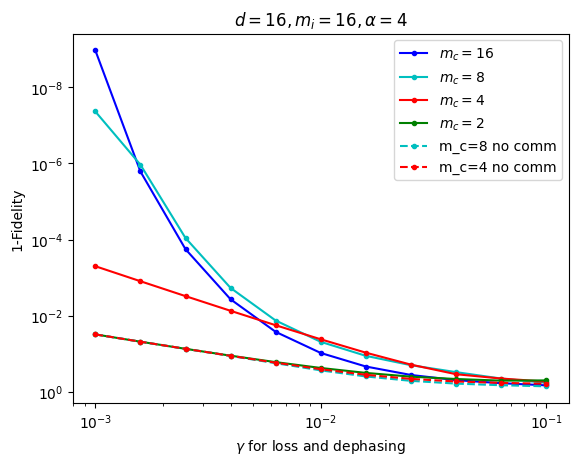

In [24]:
plt.figure(dpi=100)

plt.loglog(gamma_list,1-np.array(fid_list1616), 'b.-', label="$m_c=16$")
plt.loglog(gamma_list,1-np.array(fid_list_168), 'c.-', label="$m_c=8$")
plt.loglog(gamma_list,1-np.array(fid_list_164), 'r.-', label="$m_c=4$")
plt.loglog(gamma_list,1-np.array(fid_list_162), 'g.-', label="$m_c=2$")
plt.loglog(gamma_list,1-np.array(fid_list_168_NC), 'c.--', label="m_c=8 no comm")
plt.loglog(gamma_list,1-np.array(fid_list_164_NC), 'r.--', label="m_c=4 no comm")
# plt.loglog(gamma_list,1-np.array(fid_triv_list8), 'c.-', label="m_c=2 triv")
# plt.loglog(gamma_list,1-np.array(fid_list_162_NC), 'k.--', label="m_c=2 no comm")
# plt.loglog(gamma_list,1-np.array(fid_list_1684), 'k.--', label="$m_c=8$, $m_f=4$")
# plt.loglog(gamma_list,1-np.array(fid_list_1684_cut), 'k*--', label="$m_c=8$, $m_f=4, f_{cut}=0.9$")
# plt.loglog(gamma_list,1-np.array(fid_list_filtered), 'r.-')
# plt.loglog(gamma_list,np.array(fail_prob_list), 'g.--')

# plt.title("Infidelity with trivial protocol and with our protocol. d = 16, m_i = 4, m_c=4")
plt.xlabel(f"$\\gamma$ for loss and dephasing")  # decay and 1/{gamma_ratio} 
plt.ylabel("1-Fidelity")
plt.ylim([1,1e-5])
plt.legend()
plt.title(f"${d=},{m_i=}, \\alpha={alpha} $")
# plt.gca().invert_yaxis()

Text(0.5, 1.0, 'd=16,m_i=16, no post-selection')

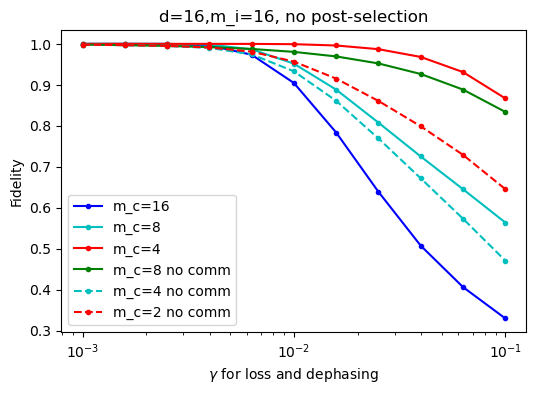

In [131]:
plt.figure(dpi=100)

legend = ["m_c=16","m_c=8","m_c=4", "m_c=8 no comm", "m_c=4 no comm", "m_c=2 no comm"]

plt.plot(gamma_list,np.array(fid_list1616), 'b.-')
plt.plot(gamma_list,np.array(fid_list_168), 'c.-')
plt.plot(gamma_list,np.array(fid_list_164), 'r.-')
plt.plot(gamma_list,np.array(fid_list_162), 'g.-')
plt.plot(gamma_list,np.array(fid_list_168_NC), 'c.--')
plt.plot(gamma_list,np.array(fid_list_164_NC), 'r.--')
# plt.loglog(gamma_list,1-np.array(fid_list_162_NC), 'k.--')
# plt.loglog(gamma_list,1-np.array(fid_list_filtered), 'r.-')
# plt.loglog(gamma_list,np.array(fail_prob_list), 'g.--')
plt.xscale('log')

# plt.title("Infidelity with trivial protocol and with our protocol. d = 16, m_i = 4, m_c=4")
plt.xlabel(f"$\gamma$ for loss and dephasing")  # decay and 1/{gamma_ratio} 
plt.ylabel("Fidelity")
# plt.ylim([1,1e-5])
plt.legend(legend)
plt.title(f"{d=},{m_i=}, no post-selection")
# plt.gca().invert_yaxis()

In [69]:
np.diff(np.array(fid_list_168))

array([-8.15547629e-12, -1.12971521e-10, -1.56073421e-09, -2.14466559e-08,
       -2.91676835e-07, -3.88855304e-06, -4.98880868e-05])

Text(0, 0.5, '1-error probability')

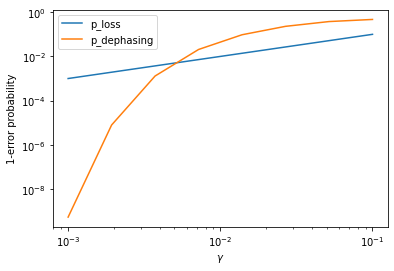

In [94]:
plt.loglog(gamma_list, [simulation4.enQudit.quditA.p_loss(gamma, 1) for gamma in gamma_list])
plt.loglog(gamma_list, [simulation4.enQudit.quditA.p_dephasing(gamma, 1) for gamma in gamma_list])

plt.legend(["p_loss","p_dephasing"])
plt.xlabel(f"$\gamma$")
plt.ylabel(f"1-error probability")

In [62]:
gamma_loss = 1e-2
gamma_dephasing = 1e-2

p_dephasing_notgood = simulation4.enQudit.p(gamma_loss,gamma_dephasing,0,1,0,0)/simulation4.probability_sum(gamma_loss,gamma_dephasing)/4 * 4
# multiply by m_i/m_f = 8 to get the real probabilities
p_loss_notgood = simulation4.enQudit.p(gamma_loss,gamma_dephasing,0,0,1,0)/simulation4.probability_sum(gamma_loss,gamma_dephasing)/2 * 2
# multiply by m_i/m_f = 8 to get the real probabilities

print(f"{p_dephasing_notgood=}")
print(f"{p_loss_notgood=}")
print(f"total estimatied fidelity: {1- (p_loss_notgood + p_dephasing_notgood)}")

simulation4.average_fidelity(gamma_loss,gamma_dephasing)


p_dephasing_notgood=0.023098186112775473
p_loss_notgood=0.008853955808297353
total estimatied fidelity: 0.9680478580789271


(0.9991880126581195, 0.0)

In [59]:
simulation4.probability_sum(1e-3,1e-3)

4.008008005336003

In [52]:
simulation4.enQudit.p(1e-3,1e-3,0,0,0,0)/simulation4.probability_sum(1e-3,1e-3)
# multiply by m_i/m_f = 8 to get the real probabilities

0.9980019976038036

In [68]:
gamma_loss = 1e-3
gamma_dephasing = 1e-3
A_1,B_1,A_2,B_2 = 0,0,1,7
m_i = 16
m_c = 16

f = simulation4.enQudit.fidelity_specific(gamma_loss_A=gamma_loss, gamma_dephasing_A=gamma_dephasing, A_1=A_1,
                                                 B_1=B_1, A_2=A_2,
                                                 B_2=B_2, m_i=m_i, m_c=m_c)
p = simulation4.enQudit.probability_specific(gamma_loss_A=gamma_loss, gamma_dephasing_A=gamma_dephasing, A_1=A_1,
                                                 B_1=B_1, A_2=A_2,
                                                 B_2=B_2, m_i=m_i, m_c=m_c)
print(f"{f=}")
print(f"{p=}")

f=6.349206342440267e-27
p=4.0


In [74]:
1-simulation4.average_fidelity(gamma_loss = gamma_loss, gamma_dephasing=gamma_dephasing)[0]

1.9973346673252124e-06

In [14]:
m_i = 16
m_c = 4
simulation4 = DiscreteSimulation(d, m_i,m_c)

simulation4.average_fidelity(gamma_loss = 10e-2, gamma_dephasing=10e-2)

In [30]:
gamma_loss = 1e-2
gamma_dephasing = 1e-2
A_1, B_1 = 0,3
A_2, B_2 = 0,0
m_i = 16
m_c = 4

print(simulation4.enQudit.fidelity_specific(gamma_loss_A=gamma_loss, gamma_dephasing_A=gamma_dephasing, 
                                      A_1=A_1, B_1=B_1, A_2=A_2, B_2=B_2, m_i=m_i, m_c=m_c))
print(simulation4.enQudit.fidelity_specific(gamma_loss_A=gamma_loss, gamma_dephasing_A=gamma_dephasing, 
                                      A_1=A_1, B_1=B_1, A_2=A_2, B_2=B_2, m_i=m_i, m_c=m_c,no_com=True))

0.9998000379678909
2.02535443505119e-09


In [22]:
a = zip(list(gamma_list),list(gamma_list), [fidelity_cut] * len(gamma_list))

In [26]:
a.__next__()

(0.03162277660168379, 0.03162277660168379, 0.999)

In [17]:
d = 32
fidelity_cut = 0
gamma_list = np.logspace(-3,-1,11)
gamma_ratio = 1

m_i = 16
m_c = 16

simulation16 = DiscreteSimulation(d, m_i,m_c )

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation16.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_cut] * len(gamma_list)))
fid_list3216 = [tup[0] for tup in fid_prob_list]
prob_list3216 = [tup[1] for tup in fid_prob_list]

print(1)

m_i = 16
m_c = 8
simulation8 = DiscreteSimulation(d, m_i,m_c)

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation8.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_cut] * len(gamma_list)))
fid_list_32168 = [tup[0] for tup in fid_prob_list]
prob_list_32168 = [tup[1] for tup in fid_prob_list]

print(2)

m_i = 16
m_c = 4
simulation4 = DiscreteSimulation(d, m_i,m_c)

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation4.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_cut] * len(gamma_list)))
fid_list_32164 = [tup[0] for tup in fid_prob_list]
prob_list_32164 = [tup[1] for tup in fid_prob_list]


1
2


In [18]:
m_i = 16
m_c = 8
m_f= 4
simulation2 = DiscreteSimulation(d, m_i,m_c, m_f=m_f)

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation2.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list)))
fid_list_321684 = [tup[0] for tup in fid_prob_list]
prob_list_1684 = [tup[1] for tup in fid_prob_list]

m_i = 16
m_c = 8
m_f= 4
simulation2 = DiscreteSimulation(d, m_i,m_c, m_f=m_f)
fidelity_cut=0.9

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation2.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_cut] * len(gamma_list)))
fid_list_321684_cut = [tup[0] for tup in fid_prob_list]
prob_list_321684_cut = [tup[1] for tup in fid_prob_list]

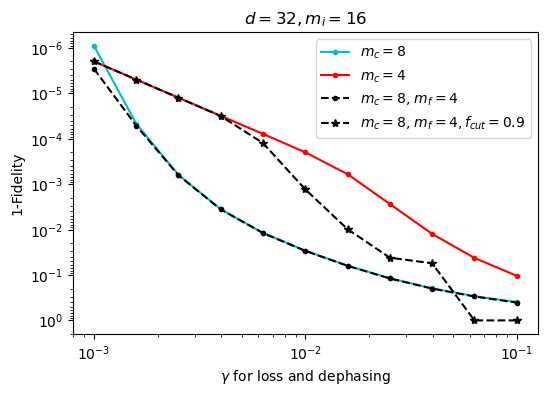

In [19]:
plt.figure(dpi=100)

# plt.loglog(gamma_list,1-np.array(fid_list1616), 'b.-', label="m_c=16")
plt.loglog(gamma_list,1-np.array(fid_list_32168), 'c.-', label="$m_c=8$")
plt.loglog(gamma_list,1-np.array(fid_list_32164), 'r.-', label="$m_c=4$")
# plt.loglog(gamma_list,1-np.array(fid_list_162), 'g.-', label="m_c=2")
# plt.loglog(gamma_list,1-np.array(fid_list_168_NC), 'c.--', label="m_c=8 no comm")
# plt.loglog(gamma_list,1-np.array(fid_list_164_NC), 'r.--', label="m_c=4 no comm")
# plt.loglog(gamma_list,1-np.array(fid_triv_list8), 'c.-', label="m_c=2 triv")
# plt.loglog(gamma_list,1-np.array(fid_list_162_NC), 'k.--', label="m_c=2 no comm")
plt.loglog(gamma_list,1-np.array(fid_list_321684), 'k.--', label="$m_c=8$, $m_f=4$")
plt.loglog(gamma_list,1-np.array(fid_list_321684_cut), 'k*--', label="$m_c=8$, $m_f=4, f_{cut}=0.9$")
# plt.loglog(gamma_list,1-np.array(fid_list_filtered), 'r.-')
# plt.loglog(gamma_list,np.array(fail_prob_list), 'g.--')

# plt.title("Infidelity with trivial protocol and with our protocol. d = 16, m_i = 4, m_c=4")
plt.xlabel(f"$\gamma$ for loss and dephasing")  # decay and 1/{gamma_ratio} 
plt.ylabel("1-Fidelity")
# plt.ylim([1,1e-5])
plt.legend()
plt.title(f"${d=},{m_i=}$")
plt.gca().invert_yaxis()

In [4]:
d = 16
qudit4 = EntangledQudit(d,d)
m_i = 16
m_c = 4
A_1, B_1 = 0, 3
A_2, B_2 = 1, 1
qudit4.fidelity_specific(gamma_loss_A=1e-2,gamma_dephasing_A=1e-2, A_1=A_1,B_1=B_1,A_2=A_2,B_2=B_2,m_i=m_i,m_c=m_c)

0.9998000379678909

In [5]:
1-fid_list[0][0]

6.656897255652439e-13

In [7]:
fid_list2

[0.9999999999993343, 0, 0, 0]

In [ ]:


# Create some sample data
x = np.logspace(0, 2, 100)
y = np.logspace(0, 2, 100)
x, y = np.meshgrid(x, y)
z = x ** 2 + y ** 2

# Create a figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface using log scale for all three axes
ax.plot_surface(np.log10(x), np.log10(y), np.log10(z))

# Set log scale for all axes
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_zscale('log')

# Set axis labels
ax.set_xlabel('Log X')
ax.set_ylabel('Log Y')
ax.set_zlabel('Log Z')

# Show the plot
plt.show()

In [29]:
d = 16
m_i = 16
m_c = 8
fidelity_cut = 1

simulation16 = DiscreteSimulation(d, m_i,m_c )

simulation16.average_fidelity(gamma_loss=1e-2,gamma_dephasing=1e-2, fidelity_cut=0.5)

(0.9986425150010688, 0.09425920207965674)

In [19]:
d = 32
fidelity_cut = 0
gamma_list = np.logspace(-3,-1,8)
gamma_ratio = 1

m_i = 16
m_c = 8
simulation8 = DiscreteSimulation(d, m_i,m_c)

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation8.average_fidelity, itertools.product(list(gamma_list),list(gamma_ratio*gamma_list),[fidelity_cut]))
fid_array_168 = [tup[0] for tup in fid_prob_list]
prob_array_168 = [tup[1] for tup in fid_prob_list]

print(2)

m_i = 16
m_c = 4
simulation4 = DiscreteSimulation(d, m_i,m_c)

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation4.average_fidelity, itertools.product(list(gamma_list),list(gamma_ratio*gamma_list),[fidelity_cut]))
fid_array_164 = [tup[0] for tup in fid_prob_list]
prob_array_164 = [tup[1] for tup in fid_prob_list]


2


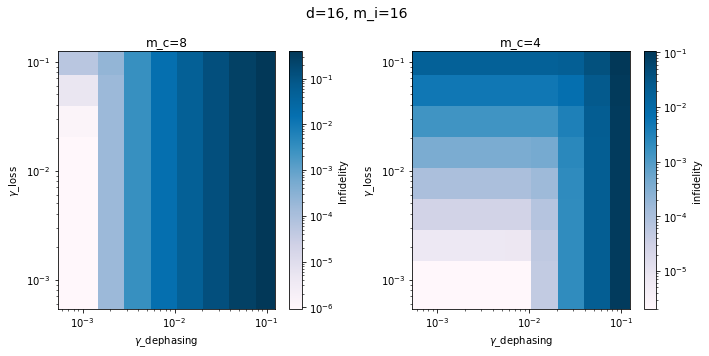

In [87]:
# Assuming fid_array_168 and prob_array_168 are already reshaped into 2D
fid_array_168_2d = np.array(fid_array_168).reshape(len(gamma_list), len(gamma_list))
fid_array_164_2d = np.array(fid_array_164).reshape(len(gamma_list), len(gamma_list))

# Create a grid of gamma values
gamma1, gamma2 = np.meshgrid(gamma_list, gamma_ratio * gamma_list)

# Create a new figure
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plt.suptitle(f"{d=}, {m_i=}", fontsize=14)

# Display fidelity data
pcm0 = axs[0].pcolormesh(gamma1, gamma2, 1-fid_array_168_2d, cmap='PuBu', norm=colors.LogNorm(), shading='auto')
fig.colorbar(pcm0, ax=axs[0], label='Infidelity')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_ylabel('$\gamma$_loss')
axs[0].set_xlabel('$\gamma$_dephasing')
axs[0].set_title('m_c=8')

# Display probability data
pcm1 = axs[1].pcolormesh(gamma1, gamma2, 1-fid_array_164_2d, cmap='PuBu', norm=colors.LogNorm())
fig.colorbar(pcm1, ax=axs[1], label='infidelity')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_ylabel('$\gamma$_loss')
axs[1].set_xlabel('$\gamma$_dephasing')
axs[1].set_title('m_c=4')

plt.tight_layout()
plt.show()

In [105]:
d = 16
m_i = 16
m_c = 4
fidelity_no_cut = 0
fidelity_cut1 = 0.5
fidelity_cut2 = 0.9
fidelity_cut3 = 0.99
gamma_list = np.logspace(-3,-1,11)
gamma_ratio = 1


print(2)

simulation4 = DiscreteSimulation(d, m_i,m_c)

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation4.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_no_cut] * len(gamma_list)))
fid_list_164 = [tup[0] for tup in fid_prob_list]
prob_list_164 = [tup[1] for tup in fid_prob_list]

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation4.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_cut1] * len(gamma_list)))
fid_list_164_cut1 = [tup[0] for tup in fid_prob_list]
prob_list_164_cut1 = [tup[1] for tup in fid_prob_list]

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation4.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_cut2] * len(gamma_list)))
fid_list_164_cut2 = [tup[0] for tup in fid_prob_list]
prob_list_164_cut2 = [tup[1] for tup in fid_prob_list]

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation4.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_cut3] * len(gamma_list)))
fid_list_164_cut3 = [tup[0] for tup in fid_prob_list]
prob_list_164_cut3 = [tup[1] for tup in fid_prob_list]

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation4.average_fidelity_no_communication, zip(list(gamma_list),list(gamma_ratio*gamma_list)))
fid_list_164_NC = [tup[0] for tup in fid_prob_list]
prob_list_164_NC = [tup[1] for tup in fid_prob_list]



2


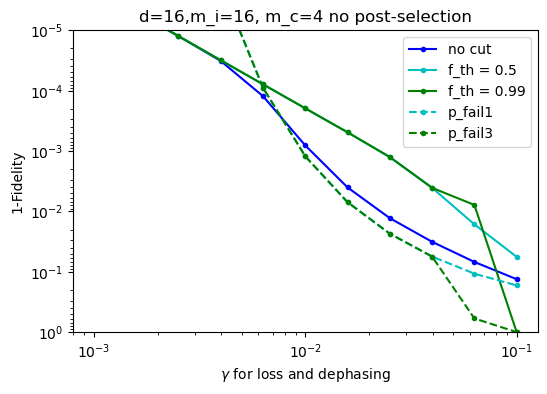

In [125]:
plt.figure(dpi=100)

legend = ["no cut", f"f_th = {fidelity_cut1}", f"f_th = {fidelity_cut2}", f"p_fail = {fidelity_cut3}"]

plt.loglog(gamma_list,1-np.array(fid_list_164), 'b.-', label="no cut")
plt.loglog(gamma_list,1-np.array(fid_list_164_cut1), 'c.-', label=f"f_th = {fidelity_cut1}")
# plt.loglog(gamma_list,1-np.array(fid_list_164_cut2), 'r.-', label=f"f_th = {fidelity_cut2}")
plt.loglog(gamma_list,1-np.array(fid_list_164_cut3), 'g.-', label=f"f_th = {fidelity_cut3}")
plt.loglog(gamma_list,np.array(prob_list_164_cut1), 'c.--', label="p_fail1")
# plt.loglog(gamma_list,np.array(prob_list_164_cut2), 'r.--', label="p_fail2")
plt.loglog(gamma_list,np.array(prob_list_164_cut3), 'g.--', label="p_fail3")
# plt.loglog(gamma_list,1-np.array(fid_list_162_NC), 'k.--')
# plt.loglog(gamma_list,1-np.array(fid_list_filtered), 'r.-')
# plt.loglog(gamma_list,np.array(fail_prob_list), 'g.--')

# plt.title("Infidelity with trivial protocol and with our protocol. d = 16, m_i = 4, m_c=4")
plt.xlabel(f"$\gamma$ for loss and dephasing")  # decay and 1/{gamma_ratio} 
plt.ylabel("1-Fidelity")
plt.ylim([1e-5,1])
plt.legend()
plt.title(f"{d=},{m_i=}, m_c=4 no post-selection")
plt.gca().invert_yaxis()

In [119]:
simulation8.average_fidelity(1e-2,1e-3,0.9)

0 0 0 0
fid=0.9999999933333334, fidelity_sum=3.999999995737367
0 0 0 1
fid=0.999999999809524, fidelity_sum=4.000005329070695
0 0 0 2
fid=0.9999999995555556, fidelity_sum=4.000805329069842
0 0 0 3
fid=0.9999999986666666, fidelity_sum=4.08080532898459
0 0 1 0
fid=0.999999999809524, fidelity_sum=4.0808106623179174
0 0 1 1
fid=0.9999999995555556, fidelity_sum=4.081610662317065
0 0 1 2
fid=0.9999999986666666, fidelity_sum=4.161610662231812
0 0 1 3
fid=0.9999999933333334, fidelity_sum=8.16161065796918
0 0 2 0
fid=0.9999999995555556, fidelity_sum=8.162410657968326
0 0 2 1
fid=0.9999999986666666, fidelity_sum=8.242410657883074
0 0 2 2
fid=0.9999999933333334, fidelity_sum=12.242410653620441
0 0 2 3
fid=0.999999999809524, fidelity_sum=12.242415986953768
0 0 3 0
fid=0.9999999986666666, fidelity_sum=12.322415986868515
0 0 3 1
fid=0.9999999933333334, fidelity_sum=16.322415982605882
0 0 3 2
fid=0.999999999809524, fidelity_sum=16.32242131593921
0 0 3 3
fid=0.9999999995555556, fidelity_sum=16.32322131

(0.9999999934391164, 1.0656586090397428e-09)

In [127]:
print(fid_list_164[10])
print(fid_list_164_cut1[10])
print(prob_list_164_cut1[10])

0.8669679687822229
0.9432435776648607
0.1687571635544367


In [163]:
d=4
m_i=4
qudit4 = EntangledQudit(d,d)

def trivial_fidelity_for_parallel(gamma, d=d, qudit4=qudit4,m_i=m_i):
    import itertools
    print(m_i)
    fid_prob = sum([(qudit4.fidelity_trivial(m_i,s_A,s_B,l_A,l_B)
                     * qudit4.p(gamma_loss_A=0, gamma_dephasing_A=gamma, s_A=s_A, s_B=s_B, l_A=l_A, l_B=l_B))
                    for s_A,s_B,l_A,l_B in itertools.product(range(d),range(d), range(d), range(d))])
    prob = sum([qudit4.p(gamma_loss_A=0, gamma_dephasing_A=gamma,
                s_A=s_A, s_B=s_B, l_A=l_A, l_B=l_B)
                for s_A,s_B,l_A,l_B in itertools.product(range(d),range(d), range(d), range(d))])
    print(np.array([(qudit4.fidelity_trivial(m_i,s_A,s_B,l_A,l_B)
                     , qudit4.p(gamma_loss_A=0, gamma_dephasing_A=gamma, s_A=s_A, s_B=s_B, l_A=l_A, l_B=l_B), s_A)
                    for s_A,s_B,l_A,l_B in itertools.product(range(d),range(d), range(d), range(d))]))
    return fid_prob/prob

trivial_fidelity_for_parallel(1e-1)



4
[[1.00000000e+00 3.89664077e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.00000007e-01 2.56706927e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.00000007e-01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.0000

0.9870800958251947

In [164]:
d=4
m_i = 4
m_c = 2
simulation2 = DiscreteSimulation(d, m_i,m_c)
simulation2.average_fidelity_no_communication(0,1e-1)

(0.9870800956339332, 0.0)

# $m_f \neq 2$

In [20]:
d = 16
fidelity_cut = 0
gamma_list = np.logspace(-3,-1,11)
gamma_ratio = 1

m_i = 16
m_c = 16
simulation16 = DiscreteSimulation(d, m_i,m_c)

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation16.average_fidelity, itertools.product(list(gamma_list),list(gamma_ratio*gamma_list),[fidelity_cut]))
fid_array_1616 = [tup[0] for tup in fid_prob_list]
prob_array_1616 = [tup[1] for tup in fid_prob_list]

print(1)

m_i = 16
m_c = 8
simulation8 = DiscreteSimulation(d, m_i,m_c)

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation8.average_fidelity, itertools.product(list(gamma_list),list(gamma_ratio*gamma_list),[fidelity_cut]))
fid_array_168 = [tup[0] for tup in fid_prob_list]
prob_array_168 = [tup[1] for tup in fid_prob_list]

print(2)

m_i = 16
m_c = 4
simulation4 = DiscreteSimulation(d, m_i,m_c)

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation4.average_fidelity, itertools.product(list(gamma_list),list(gamma_ratio*gamma_list),[fidelity_cut]))
fid_array_164 = [tup[0] for tup in fid_prob_list]
prob_array_164 = [tup[1] for tup in fid_prob_list]

print(3)

In [25]:
m_i = 16
m_c = 8
m_f = 4
simulation2 = DiscreteSimulation(d, m_i,m_c, m_f=m_f)

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation2.average_fidelity, itertools.product(list(gamma_list),list(gamma_ratio*gamma_list),[fidelity_cut]))
fid_array_1684 = [tup[0] for tup in fid_prob_list]
prob_array_1684 = [tup[1] for tup in fid_prob_list]

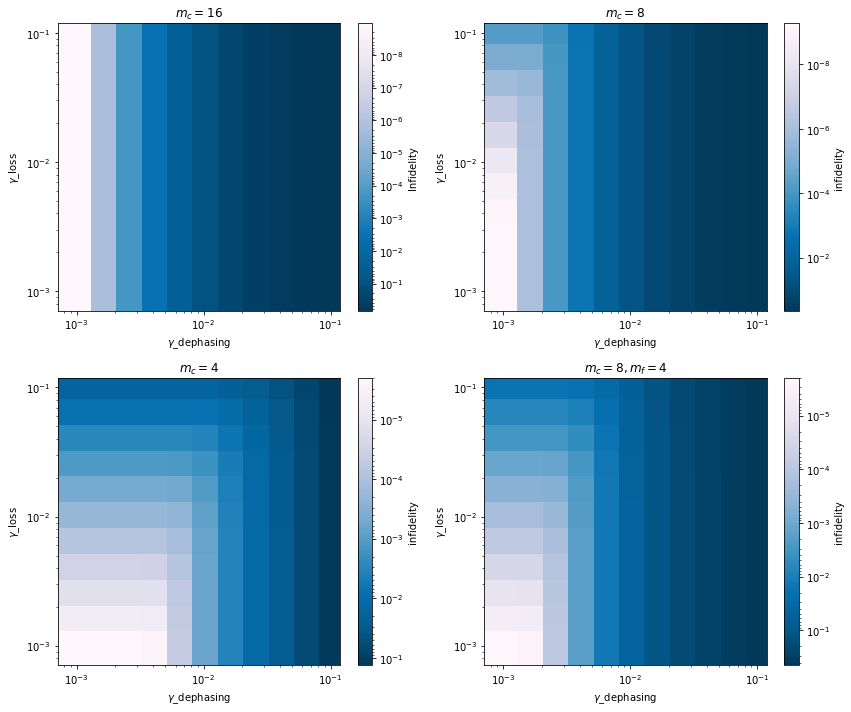

<Figure size 432x288 with 0 Axes>

In [26]:
# Assuming fid_array_168 and prob_array_168 are already reshaped into 2D
fid_array_1616_2d = np.array(fid_array_1616).reshape(len(gamma_list), len(gamma_list))
fid_array_168_2d = np.array(fid_array_168).reshape(len(gamma_list), len(gamma_list))
fid_array_164_2d = np.array(fid_array_164).reshape(len(gamma_list), len(gamma_list))
fid_array_1684_2d = np.array(fid_array_1684).reshape(len(gamma_list), len(gamma_list))

# Create a grid of gamma values
gamma1, gamma2 = np.meshgrid(gamma_list, gamma_ratio * gamma_list)

vmin, vmax = None, None

# Create a new figure
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Display fidelity data
pcm0 = axs[0,0].pcolormesh(gamma1, gamma2, 1-fid_array_1616_2d, cmap='PuBu', norm=colors.LogNorm(vmin=vmin, vmax=vmax), shading='auto')
fig.colorbar(pcm0, ax=axs[0,0], label='Infidelity').ax.invert_yaxis()
axs[0,0].set_xscale('log')
axs[0,0].set_yscale('log')
axs[0,0].set_ylabel('$\gamma$_loss')
axs[0,0].set_xlabel('$\gamma$_dephasing')
axs[0,0].set_title('$m_c=16$')


# Display m_c=4 data
pcm1 = axs[0,1].pcolormesh(gamma1, gamma2, 1-fid_array_168_2d, cmap='PuBu', norm=colors.LogNorm())
fig.colorbar(pcm1, ax=axs[0,1], label='infidelity').ax.invert_yaxis()
axs[0,1].set_xscale('log')
axs[0,1].set_yscale('log')
axs[0,1].set_ylabel('$\gamma$_loss')
axs[0,1].set_xlabel('$\gamma$_dephasing')
axs[0,1].set_title('$m_c=8$')

# Display m_c=2 data
pcm2 = axs[1,0].pcolormesh(gamma1, gamma2, 1-fid_array_164_2d, cmap='PuBu', norm=colors.LogNorm())
fig.colorbar(pcm2, ax=axs[1,0], label='infidelity').ax.invert_yaxis()
axs[1,0].set_xscale('log')
axs[1,0].set_yscale('log')
axs[1,0].set_ylabel('$\gamma$_loss')
axs[1,0].set_xlabel('$\gamma$_dephasing')
axs[1,0].set_title('$m_c=4$')

# Display m_c=2 data
pcm2 = axs[1,1].pcolormesh(gamma1, gamma2, 1-fid_array_1684_2d, cmap='PuBu', norm=colors.LogNorm())
fig.colorbar(pcm2, ax=axs[1,1], label='infidelity').ax.invert_yaxis()
axs[1,1].set_xscale('log')
axs[1,1].set_yscale('log')
axs[1,1].set_ylabel('$\gamma$_loss')
axs[1,1].set_xlabel('$\gamma$_dephasing')
axs[1,1].set_title('$m_c=8, m_f=4$')

plt.tight_layout()
plt.show()

# plt.savefig('plots/2d_infidelity_for_different_m_c.svg', format='svg')

In [27]:
@dataclass
class SimResults2D:
    m_i: int
    m_c: int
    m_f: int
    simulationObject: DiscreteSimulation
    fid_prob_list: list
    
    def get_fid_array(self):
        return [tup[0] for tup in self.fid_prob_list]
    
    def get_prob_array(self):
        return [tup[1] for tup in fid_prob_list]

d = 32
fidelity_cut = 0
gamma_list = np.logspace(-3,-1,15)
gamma_ratio = 1
alpha=8

m_i = 32
m_f = 2

res_list = []

m_c_list = [32,16,8,4,2]

for m_c in tqdm(m_c_list):
    simulation = DiscreteSimulation(d, m_i,m_c, alpha=alpha)
    with mp.Pool(50) as pool:
        fid_prob_list = pool.starmap(simulation.average_fidelity, itertools.product(list(gamma_list),list(gamma_ratio*gamma_list),[fidelity_cut]))
    simulation.clear_cache()
    res_list.append(SimResults2D(m_i,m_c,m_f, simulation, fid_prob_list))


  0%|          | 0/5 [00:00<?, ?it/s]

In [28]:
import dill

with open('res_list32.pkl', 'wb') as file:
    dill.dump(res_list, file)

In [7]:
with open('res_list.pkl', 'rb') as file:
    loaded_res_list = dill.load(file)

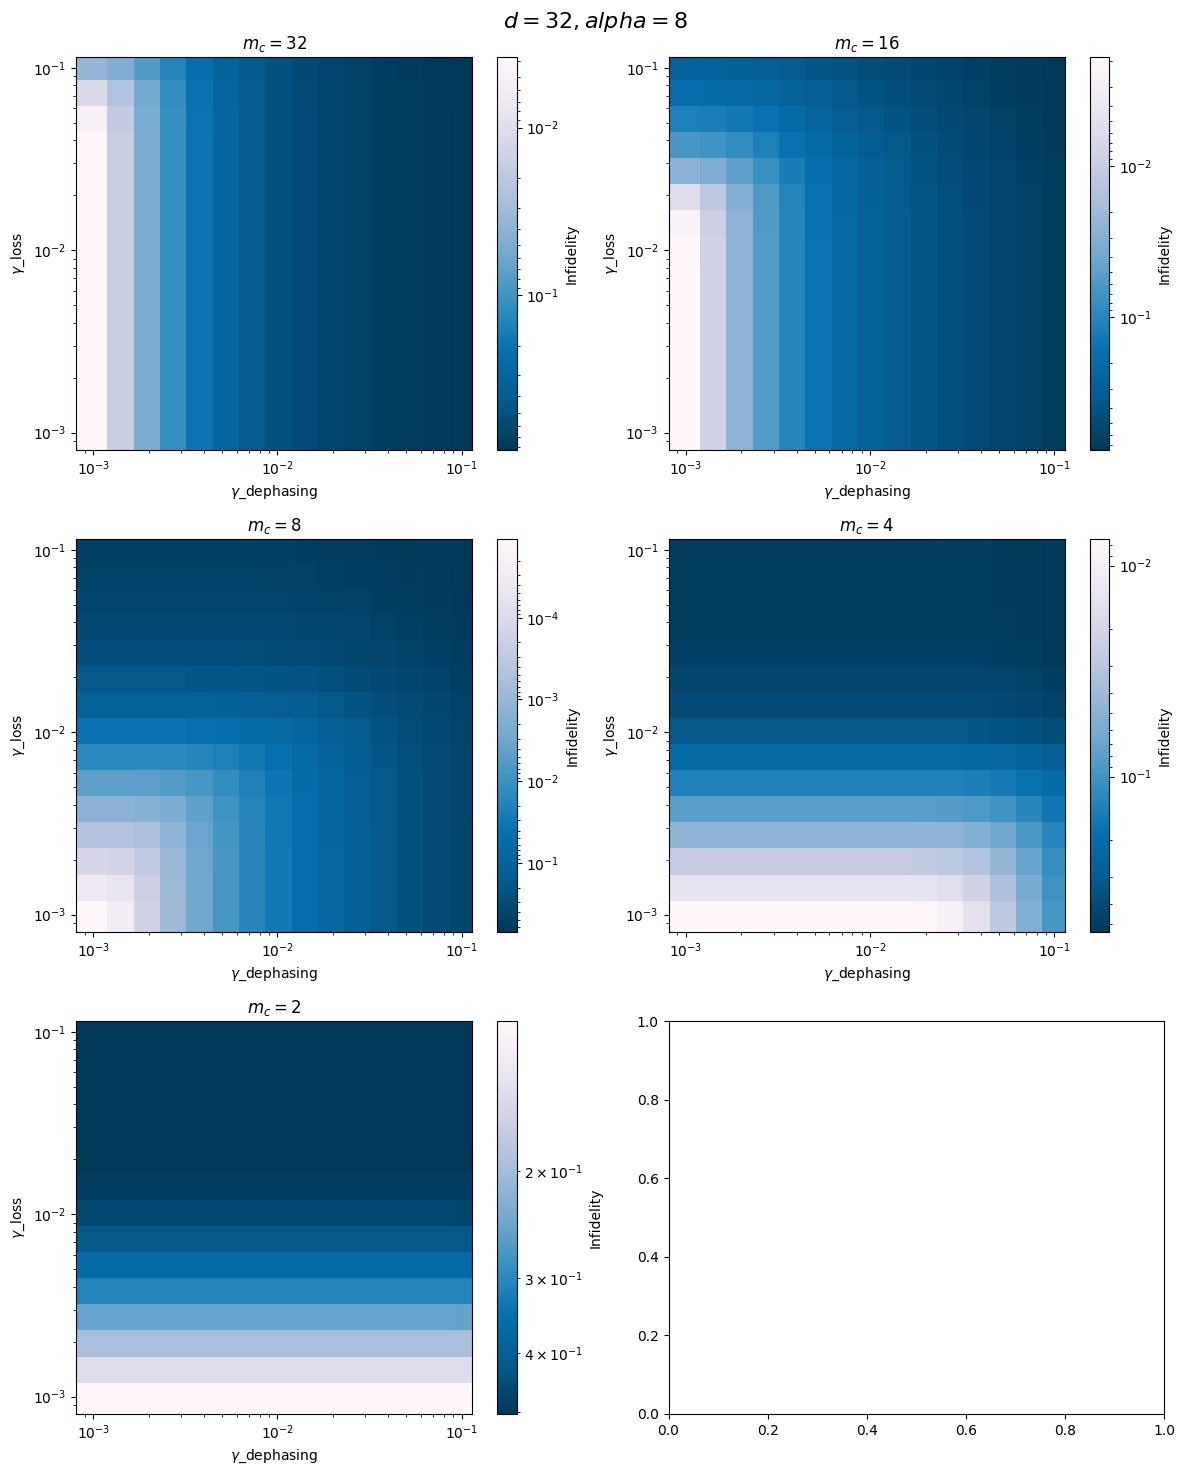

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [28]:
# Assuming fid_array_168 and prob_array_168 are already reshaped into 2D
# fid_array_1616_2d = np.array(fid_array_1616).reshape(len(gamma_list), len(gamma_list))
# fid_array_168_2d = np.array(fid_array_168).reshape(len(gamma_list), len(gamma_list))
# fid_array_164_2d = np.array(fid_array_164).reshape(len(gamma_list), len(gamma_list))
# fid_array_1684_2d = np.array(fid_array_1684).reshape(len(gamma_list), len(gamma_list))

# Create a grid of gamma values
gamma1, gamma2 = np.meshgrid(gamma_list, gamma_ratio * gamma_list)

vmin, vmax = None, None

# Create a new figure
fig, axs = plt.subplots(int(len(res_list)/2+0.5), 2, figsize=(12, 5 * int(len(res_list)/2+0.5)))

# Display fidelity data
for ax,sim_res in zip(axs.flatten(),res_list):
    fid_array_2d = np.array(sim_res.get_fid_array()).reshape(len(gamma_list), len(gamma_list))
    pcm = ax.pcolormesh(gamma1, gamma2, 1-fid_array_2d, cmap='PuBu', norm=colors.LogNorm(vmin=vmin, vmax=vmax), shading='auto')
    fig.colorbar(pcm, ax=ax, label='Infidelity').ax.invert_yaxis()
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylabel('$\gamma$_loss')
    ax.set_xlabel('$\gamma$_dephasing')
    ax.set_title(f'$m_c={sim_res.m_c}$')

fig.suptitle(f"$d={sim_res.simulationObject.d}, alpha={sim_res.simulationObject.alpha}$", fontsize=16)

plt.tight_layout()
plt.show()

C:\Users\shohamj\AppData\Local\Temp\ipykernel_29136\2620456908.py:1: DeprecationWarning: Please use `center_of_mass` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  from scipy.ndimage.measurements import center_of_mass


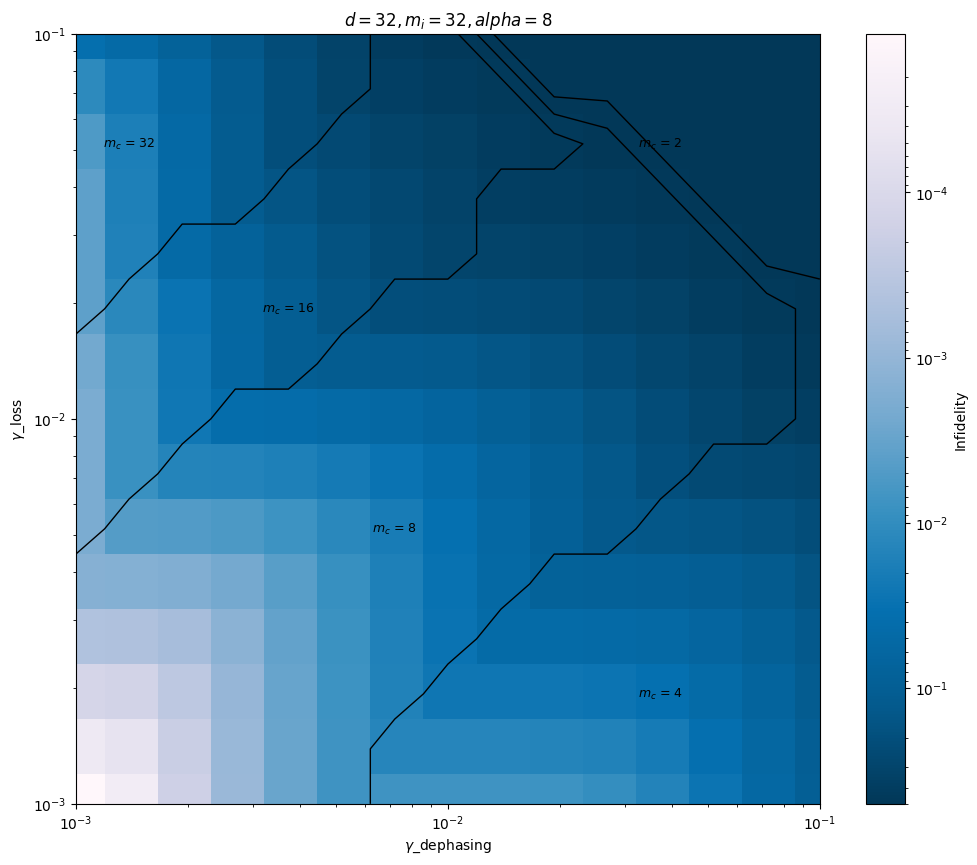

In [29]:
from scipy.ndimage.measurements import center_of_mass

array_list = [np.array(sim_res.get_fid_array()).reshape(len(gamma_list), len(gamma_list)) for sim_res in res_list]
arrays = np.stack(array_list)

max_values = np.maximum.reduce(array_list)

# Determine the index of the maximum value along the third dimension
max_indices = np.argmax(arrays, axis=0)

gamma1, gamma2 = np.meshgrid(gamma_list, gamma_ratio * gamma_list)

fig, ax = plt.subplots(figsize=(12, 10))

# Using the original gamma values and max_values for pcolormesh
pcm = ax.pcolormesh(gamma1, gamma2, 1-max_values, cmap='PuBu', norm=colors.LogNorm(vmin=vmin, vmax=vmax), shading='auto')
fig.colorbar(pcm, ax=ax, label='Infidelity').ax.invert_yaxis()

# Using the extended values for contour plot
contour = ax.contour(gamma1, gamma2, max_indices, colors='k', levels=np.arange(-0.5, 4.5, 1), linewidths=1)

unique_values = np.unique(max_indices.round(decimals=2))
for value in unique_values:
    mask = np.isclose(max_indices, value, atol=1e-2)
    y_center, x_center = center_of_mass(mask)
    m_c_string = f"$m_c$ = {res_list[int(value)].m_c}"
    plt.text(gamma_list[int(x_center)], gamma_list[int(y_center)], m_c_string, fontsize=9, ha='center', va='center')


ax.set_xlim([gamma1.min(), gamma1.max()])
ax.set_ylim([gamma2.min(), gamma2.max()])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('$\gamma$_loss')
ax.set_xlabel('$\gamma$_dephasing')
ax.set_title(f"$d={sim_res.simulationObject.d}, m_i={sim_res.m_i}, alpha={sim_res.simulationObject.alpha}$")

plt.show()

In [3]:
@dataclass
class SimResults2D:
    m_i: int
    m_c: int
    m_f: int
    simulationObject: DiscreteSimulation
    fid_prob_list: list
    
    def get_fid_array(self):
        return [tup[0] for tup in self.fid_prob_list]
    
    def get_prob_array(self):
        return [tup[1] for tup in fid_prob_list]

d = 32
fidelity_cut = 0
gamma_list = np.logspace(-3,-1,1)
gamma_ratio = 1

m_i = 32
m_f = 2

res_list = []

simulation = DiscreteSimulation(d, m_i,32)
simulation.average_fidelity(gamma_list[0],gamma_list[0],)

calculating for gamma_loss=0.001, gamma_dephasing=0.001


(0.9961941866459524, 0.0)

In [20]:
max_indices

array([[2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4],
       [2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4],
       [2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4],
       [2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4],
       [2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4],
       [2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4],
       [2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4],
       [2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4],
       [2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4],
       [2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4],
       [2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4],
       [2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4],
       [2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3]], dtype=int64)

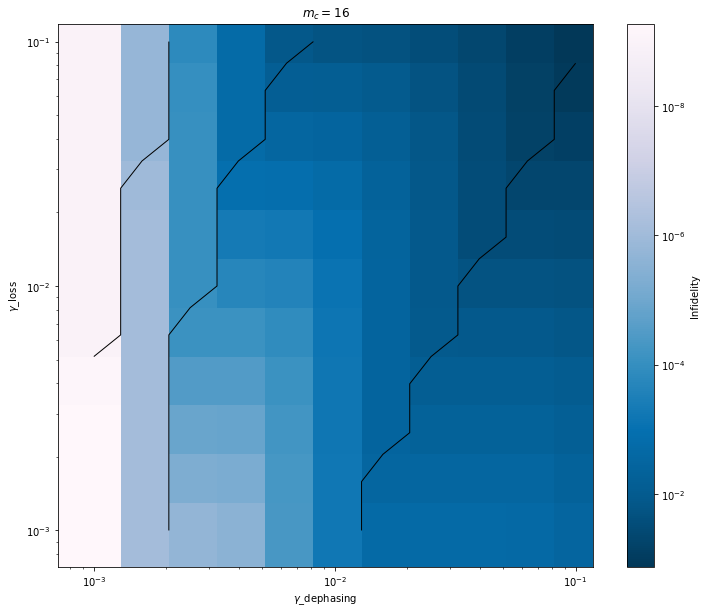

In [39]:
array_list = [np.array(sim_res.get_fid_array()).reshape(len(gamma_list), len(gamma_list)) for sim_res in res_list]
arrays = np.stack(array_list)

max_values = np.maximum.reduce(array_list)

# Determine the index of the maximum value along the third dimension
max_indices = np.argmax(arrays, axis=0)

fig, ax = plt.subplots(figsize=(12, 10))

# Plot the 2D array of indices
pcm = ax.pcolormesh(gamma1, gamma2, 1-max_values, cmap='PuBu', norm=colors.LogNorm(vmin=vmin, vmax=vmax), shading='auto')
fig.colorbar(pcm, ax=ax, label='Infidelity').ax.invert_yaxis()
ax.contour(gamma1, gamma2, max_indices, colors='k', levels=np.arange(-0.5, 3.5, 1), linewidths=1)


ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('$\gamma$_loss')
ax.set_xlabel('$\gamma$_dephasing')
ax.set_title('$m_c=16$')


plt.show()

TypeError: Shapes of x (13, 11) and z (11, 11) do not match

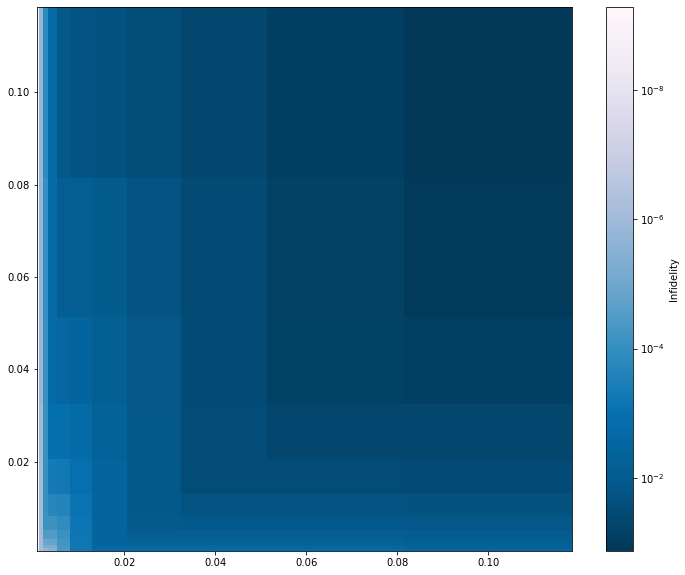

In [42]:
from scipy.ndimage import convolve

# Create a kernel to extend the boundaries
kernel = np.array([[1, 1, 1],
                   [1, 0, 1],
                   [1, 1, 1]])

# Apply the convolution to "extend" the boundaries
extended_max_indices = convolve(max_indices, kernel, mode='nearest')

fig, ax = plt.subplots(figsize=(12, 10))

# Extend the range of gamma1 and gamma2 as well
extended_gamma1 = np.concatenate([[gamma1[0]], gamma1, [gamma1[-1]]])
extended_gamma2 = np.concatenate([[gamma2[0]], gamma2, [gamma2[-1]]])

pcm = ax.pcolormesh(gamma1, gamma2, 1-max_values, cmap='PuBu', norm=colors.LogNorm(vmin=vmin, vmax=vmax), shading='auto')
fig.colorbar(pcm, ax=ax, label='Infidelity').ax.invert_yaxis()

# Use the extended_max_indices for contour plot
ax.contour(extended_gamma1, extended_gamma2, extended_max_indices, colors='k', levels=np.arange(-0.5, 3.5, 1), linewidths=1)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('$\gamma$_loss')
ax.set_xlabel('$\gamma$_dephasing')
ax.set_title('$m_c=16$')

plt.show()

In [44]:
# Extend max_indices by one row and one column on each side
extended_max_indices = np.pad(max_indices, pad_width=1, mode='edge')

gamma_list_extended = np.concatenate([[gamma_list[0]**2 / gamma_list[1]], gamma_list, [gamma_list[-1]**2 / gamma_list[-2]]])

# Create the new extended mesh grid
extended_gamma1, extended_gamma2 = np.meshgrid(gamma_list_extended, gamma_ratio * gamma_list_extended)


# Extend gamma1 and gamma2 by repeating the first and last values
# extended_gamma1 = np.concatenate([[gamma1[0] * gamma1[0] / gamma1[1]], gamma1, [gamma1[-1] * gamma1[-1] / gamma1[-2]]])
# extended_gamma2 = np.concatenate([[gamma2[0] * gamma2[0] / gamma2[1]], gamma2, [gamma2[-1] * gamma2[-1] / gamma2[-2]]])


array([[1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3],
       [1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3],
       [0, 0, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3],
       [0, 0, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3],
       [0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3],
       [0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3],
       [0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3],
       [0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3],
       [0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2],
       [0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2]], dtype=int64)